# __Bellabeat Case Study using Python__

## __1. Ask__
<hr color='black'>

### __Introduction__

Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market.

**Stakeholders:**
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.
2. Sando Mur:  Bellabeat’s cofounder and a key member of the Bellabeat executive team.

Bellabeat's products are Bellabeat app, Leaf, Time, Spring, Bellabeat membership. In this analysis we will focus on the bellabeat app. 

The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

### __Business task__

The Business task is to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights we discover will then help guide marketing strategy for the company. We also have to present our analysis along with your high-level recommendations to the Bellabeat executive team.

**Questions for analysis:**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## __2. Prepare__
<hr color='black'>

Dataset Used:
FitBit Fitness Tracker Data available in Kaggle. It contains personal fitness tracker from thirty fitbit users gathered with their consent. It includes minute-level output for physical activity, heart rate, and sleep monitoring along with data about  daily activity, steps, and heart rate. 
The data is stored in long format.

## __3. Process__
<hr color='black'>

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the datasets

In [2]:
dailyActivity = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
SleepDay = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourlyCalories = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
heartrateSeconds = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weightInfo = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


### __Cleaning the datasets__

In [3]:
print("Daily Activity")
print(dailyActivity.head())
print("==================================================================================")

print("Daily Sleep")
print(SleepDay.head())
print("==================================================================================")

print("Hourly Calories")
print(hourlyCalories.head())
print("==================================================================================")

print("Hourly Intensities")
print(hourlyIntensities.head())
print("==================================================================================")

print("Heartrate Seconds")
print(heartrateSeconds.head())
print("==================================================================================")

print("Weight Log Info")
print(weightInfo.head())

Daily Activity
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0      

#### Lets convert all the date columns into datetime object and rename it as ActivityDate. Here lets also split the date columns into date and time.

In [4]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])

Automating the above process for other datasets

In [5]:
def process_dataframe(df):
    # converting date column to datetime
    date_col = df.columns[1]
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Creating separate 'date' and 'time' columns
    df['ActivityDate'] = df[date_col].dt.date
    df['ActivityTime'] = df[date_col].dt.strftime('%I:%M:%S %p')
    df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
    df.drop(columns=[date_col],inplace=True)
    
    return df

dataframes = [SleepDay, hourlyCalories, hourlyIntensities, heartrateSeconds, weightInfo]

for i, df in enumerate(dataframes):
    dataframes[i] = process_dataframe(df)

for i, df in enumerate(dataframes, 1):
    print(f"DataFrame {i}:\n", df.head())
    print(df['ActivityDate'].dtypes)


/tmp/ipykernel_18/3177711814.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])
/tmp/ipykernel_18/3177711814.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])
/tmp/ipykernel_18/3177711814.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])


DataFrame 1:
            Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  \
0  1503960366                  1                 327             346   
1  1503960366                  2                 384             407   
2  1503960366                  1                 412             442   
3  1503960366                  2                 340             367   
4  1503960366                  1                 700             712   

  ActivityDate ActivityTime  
0   2016-04-12  12:00:00 AM  
1   2016-04-13  12:00:00 AM  
2   2016-04-15  12:00:00 AM  
3   2016-04-16  12:00:00 AM  
4   2016-04-17  12:00:00 AM  
datetime64[ns]
DataFrame 2:
            Id  Calories ActivityDate ActivityTime
0  1503960366        81   2016-04-12  12:00:00 AM
1  1503960366        61   2016-04-12  01:00:00 AM
2  1503960366        59   2016-04-12  02:00:00 AM
3  1503960366        47   2016-04-12  03:00:00 AM
4  1503960366        48   2016-04-12  04:00:00 AM
datetime64[ns]
DataFrame 3:
            Id  

/tmp/ipykernel_18/3177711814.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])


#### Now lets check if there are any duplicate records in any dataset

In [6]:
grouped = dailyActivity.groupby(['Id', 'ActivityDate']).size().reset_index(name='Count')
duplicates = grouped[grouped['Count'] > 1]
print("\n Duplicates in activity record:")
print(duplicates)

#==================================
grouped1 = SleepDay.groupby(['Id', 'ActivityDate','ActivityTime','TotalSleepRecords']).size().reset_index(name='Count')
duplicates1 = grouped1[grouped1['Count'] > 1]
print("\nDuplicates in sleep record:")
print(duplicates1)

#==================================
grouped2 = hourlyCalories.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates2 = grouped2[grouped2['Count'] > 1]
print("\nDuplicates in hourly calories record:")
print(duplicates2)

#==================================
grouped3 = hourlyIntensities.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates3 = grouped3[grouped3['Count'] > 1]
print("\nDuplicates in hourly intensities record:")
print(duplicates3)

#==================================
grouped4 = heartrateSeconds.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates4 = grouped4[grouped4['Count'] > 1]
print("\nDuplicates in heartrate seconds record:")
print(duplicates4)


 Duplicates in activity record:
Empty DataFrame
Columns: [Id, ActivityDate, Count]
Index: []

Duplicates in sleep record:
             Id ActivityDate ActivityTime  TotalSleepRecords  Count
160  4388161847   2016-05-05  12:00:00 AM                  1      2
221  4702921684   2016-05-07  12:00:00 AM                  1      2
377  8378563200   2016-04-25  12:00:00 AM                  1      2

Duplicates in hourly calories record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []

Duplicates in hourly intensities record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []

Duplicates in heartrate seconds record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []


**Only the SleepDay dataset has duplicates. Let's remove them.**

In [7]:
# Filtering the original SleepDay DataFrame to show only the duplicate records
duplicate_records = SleepDay[SleepDay.set_index(['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords']).index.isin(duplicates1.set_index(['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords']).index)]
print("\nDuplicate records in the original DataFrame:")
print(duplicate_records)

# Removing the duplicate records from the original DataFrame
SleepDay.drop_duplicates(subset=['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords'], inplace=True)


Duplicate records in the original DataFrame:
             Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  \
160  4388161847                  1                 471             495   
161  4388161847                  1                 471             495   
222  4702921684                  1                 520             543   
223  4702921684                  1                 520             543   
379  8378563200                  1                 388             402   
380  8378563200                  1                 388             402   

    ActivityDate ActivityTime  
160   2016-05-05  12:00:00 AM  
161   2016-05-05  12:00:00 AM  
222   2016-05-07  12:00:00 AM  
223   2016-05-07  12:00:00 AM  
379   2016-04-25  12:00:00 AM  
380   2016-04-25  12:00:00 AM  


#### Now let's check if there are null values and remove them.

In [8]:
import pandas as pd
import numpy as np

# Function to check for missing values including NaN, None, and empty strings
def check_missing_values(df):
    return {
        'null_values': df.isnull().values.sum(),
        'empty_strings': (df == '').values.sum(),
        'na_values': df.isna().values.sum()
    }

# Check for missing values in each DataFrame
print("Missing values in dailyActivity:")
print(check_missing_values(dailyActivity))

print("\nMissing values in SleepDay:")
print(check_missing_values(SleepDay))

print("\nMissing values in hourlyCalories:")
print(check_missing_values(hourlyCalories))

print("\nMissing values in hourlyIntensities:")
print(check_missing_values(hourlyIntensities))

print("\nMissing values in heartrateSeconds:")
print(check_missing_values(heartrateSeconds))

Missing values in dailyActivity:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in SleepDay:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in hourlyCalories:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in hourlyIntensities:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}

Missing values in heartrateSeconds:
{'null_values': 0, 'empty_strings': 0, 'na_values': 0}


**There are no null or missing values in the dataset.**

### Exploring the datasets

**Let's add a column to display the day of the week in dailyActivity and sleepDay dataset. Also add column to display totalActiveMinutes.**

In [9]:
dailyActivity["Day"] = dailyActivity["ActivityDate"].dt.day_name()
SleepDay["Day"] = SleepDay["ActivityDate"].dt.day_name()

dailyActivity["TotalActiveMinutes"] = dailyActivity[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes']].sum(axis=1)

In [10]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,267


**Merging SleepDay and DailyActivity on 'Id and ActivityDate' using inner join**

In [11]:
merged_ActivitySleep = pd.merge(dailyActivity, SleepDay, on=['Id', 'ActivityDate','Day'], how='inner')
merged_ActivitySleep.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,TotalActiveMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityTime
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,Tuesday,366,1,327,346,12:00:00 AM
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,Wednesday,257,2,384,407,12:00:00 AM
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,Friday,272,1,412,442,12:00:00 AM
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,Saturday,267,2,340,367,12:00:00 AM
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,Sunday,222,1,700,712,12:00:00 AM


In [12]:
# checking number of unique elements in each dataset
print("daily activity: ",len(dailyActivity.Id.value_counts()))
print("sleep day: ",len(SleepDay.Id.value_counts()))
print("hourly calories: ",len(hourlyCalories.Id.value_counts()))
print("hourly Intensities: ",len(hourlyIntensities.Id.value_counts()))
print("heartrate Seconds: ",len(heartrateSeconds.Id.value_counts()))
print("weight info: ",len(weightInfo.Id.value_counts()))
print("merged activity and sleep: ",len(merged_ActivitySleep.Id.value_counts()))

daily activity:  33
sleep day:  24
hourly calories:  33
hourly Intensities:  33
heartrate Seconds:  14
weight info:  8
merged activity and sleep:  24


**The weight info dataset has only 8 values which is very less to make any observations or predictions.**

Now that we have finished the cleaning lets proceed with the analysis

## __4. Analyze__
<hr color='black'>

#### First let's look at some of the summary statistics

In [13]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print("Activity Distance Summary\n",dailyActivity[['TotalSteps','TotalDistance']].describe())
    print("\n Activity Time Summary\n",dailyActivity[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].describe())
    print("\n Sleep Summary\n",SleepDay[['TotalMinutesAsleep','TotalTimeInBed']].describe())
    print("\n Hourly Calories\n",hourlyCalories[['Calories']].describe())
    print("\n Hourly Intensities\n",hourlyIntensities[['TotalIntensity','AverageIntensity']].describe())
    print("\n Heartrate Seconds\n",heartrateSeconds[['Value']].describe())

Activity Distance Summary
        TotalSteps  TotalDistance
count     940.000        940.000
mean     7637.911          5.490
std      5087.151          3.925
min         0.000          0.000
25%      3789.750          2.620
50%      7405.500          5.245
75%     10727.000          7.712
max     36019.000         28.030

 Activity Time Summary
        VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  \
count            940.000              940.000               940.000   
mean              21.165               13.565               192.813   
std               32.845               19.987               109.175   
min                0.000                0.000                 0.000   
25%                0.000                0.000               127.000   
50%                4.000                6.000               199.000   
75%               32.000               19.000               264.000   
max              210.000              143.000               518.000   

       Sede

### __Some observations from the above summaries:__

1. The std deviation of 5087 steps suggest that data has huge variation with some days having no record of steps and some days having extreme of 36019 steps.
1. The mean steps of 7637 suggest that the participants are somewhat active. Centers for Disease Control and Prevention (CDC) recommends near about 10000 steps for healthy adults in order to achieve health benifits such as lose weight, reduce risk of heart disease, etc.

1. Time spent on intense and moderate physical activity is relatively low with some days having significant activity. Majority of time is spent on light activities. The high average of 991 time spent on sedentary activities may lead to health problems. Time spent on sedentary activity needs to be reduced while increasing the moderate or highly active minutes. 

1. The average sleep time is approx 7 hours which falls in the recommended range of 7-9 hours.

1. The mean heart rate of 77.32 bpm falls within the normal resting heart rate range of 60 to 100 bpm. The min heart rate of 36 bpm could indicate a very relaxed state or a state of deep sleep. The max heart rate of 203 bpm could be indicative of period of intense physical activity or stress. This can be monitored and alerts can be issued for abnormally high heart rate.



### __Data Visualization__

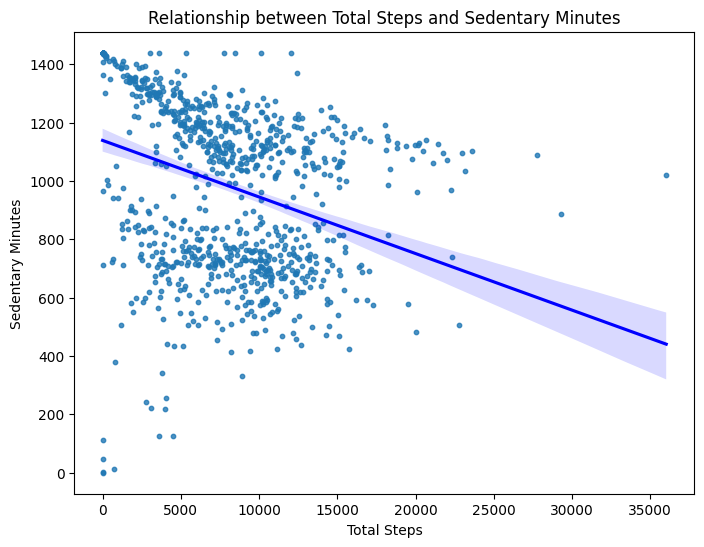

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(data=dailyActivity, x='TotalSteps', y='SedentaryMinutes', scatter_kws={'s':10}, line_kws={'color':'blue'})

plt.title('Relationship between Total Steps and Sedentary Minutes')
plt.xlabel('Total Steps')
plt.ylabel('Sedentary Minutes')

plt.show()

The plot shows negative correlation as more active people will spend less time being sedentary.

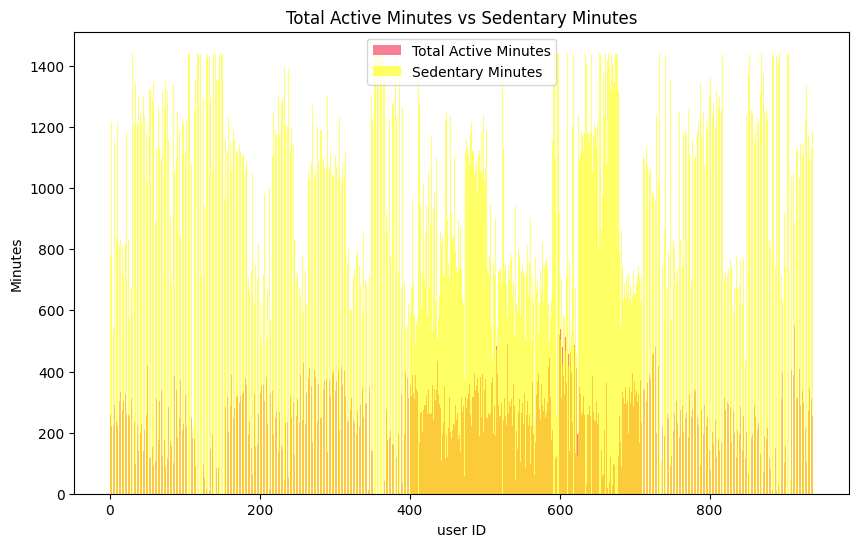

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(dailyActivity.index, dailyActivity['TotalActiveMinutes'], label='Total Active Minutes', alpha=0.6,color='#f22a51')
plt.bar(dailyActivity.index, dailyActivity['SedentaryMinutes'], label='Sedentary Minutes', alpha=0.6,color='yellow')

plt.xlabel('user ID')
plt.ylabel('Minutes')
plt.title('Total Active Minutes vs Sedentary Minutes')
plt.legend()
plt.show()

The Total Active Minutes is significantly less than the Sedentary Minutes which may lead to health issues and is definately a cause of concern.

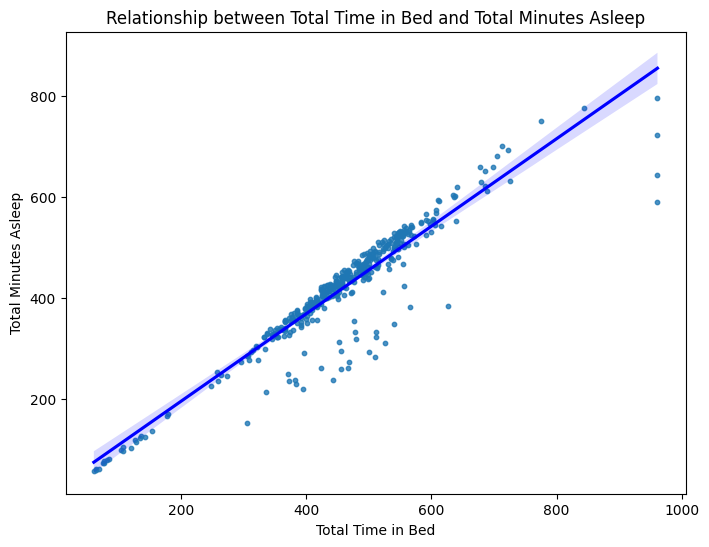

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(data=SleepDay, x='TotalTimeInBed', y='TotalMinutesAsleep', scatter_kws={'s':10}, line_kws={'color':'blue'})

plt.title('Relationship between Total Time in Bed and Total Minutes Asleep')
plt.xlabel('Total Time in Bed')
plt.ylabel('Total Minutes Asleep')

plt.show()

A linear relationship is seen between Total Minutes Asleep and Total Time in Bed. The Bellabeat app can implement a feature to nudge its users to go to sleep to ensure that they get adequate sleep.

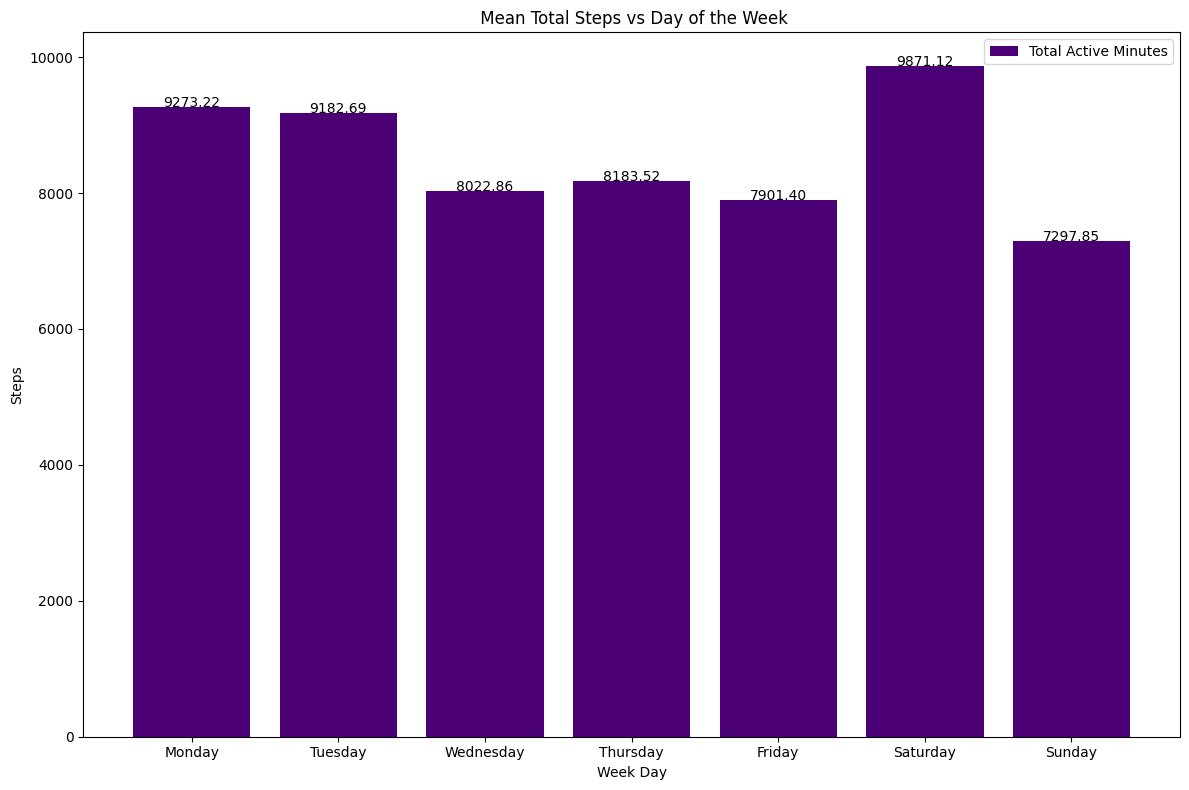

In [17]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i], y[i], f'{y[i]:.2f}', ha='center')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to a categorical type with the specified order
merged_ActivitySleep['Day'] = pd.Categorical(merged_ActivitySleep['Day'], categories=day_order, ordered=True)

# Aggregate the data by day
daily_totals = merged_ActivitySleep.groupby('Day',observed=True).agg({
    'TotalSteps': 'mean',
}).reset_index()

daily_totals['Day'] = pd.Categorical(daily_totals['Day'], categories=day_order, ordered=True)
daily_totals = daily_totals.sort_values('Day')

plt.figure(figsize=(12, 8))
bar_width = 0.4

plt.bar(daily_totals['Day'], daily_totals['TotalSteps'], color="#4b0076", label='Total Active Minutes')
plt.xlabel("Week Day")
plt.ylabel("Steps")
plt.title(" Mean Total Steps vs Day of the Week")
plt.legend()
# plt.grid(True)
plt.tight_layout()
addlabels(daily_totals['Day'], daily_totals['TotalSteps'])
plt.show()


On Saturday people tend to walk more whereas on Sunday they tend to walk the least. This may be because people use Sunday to rest after the busy week.

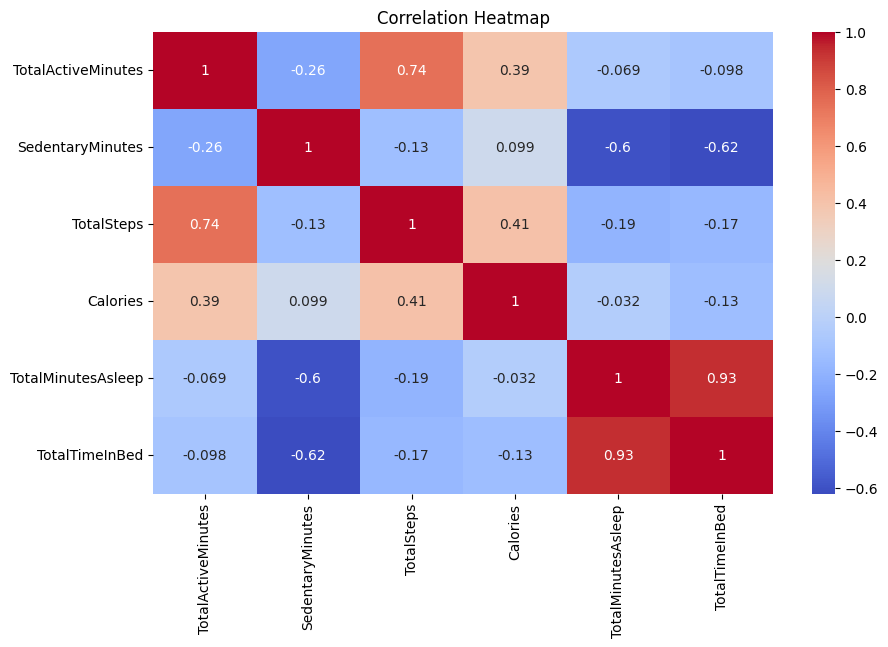

In [18]:
plt.figure(figsize=(10, 6))
corr = merged_ActivitySleep[['TotalActiveMinutes','SedentaryMinutes','TotalSteps','Calories','TotalMinutesAsleep','TotalTimeInBed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the above heatmap we can observe the following:
1. People with more active minutes and steps tend to burn more calories as indicated by the highly positive correlation 0.39 and 0.41 respectively.
1. There is a higly negative correlation between Sedentary Minutes and Total Minutes Asleep. People who spend a lot of time being sedentary during the day may have less need or opportunity to sleep. This can be due to sedentary lifestyle choices which replaces time that could be spent resting or sleeping.


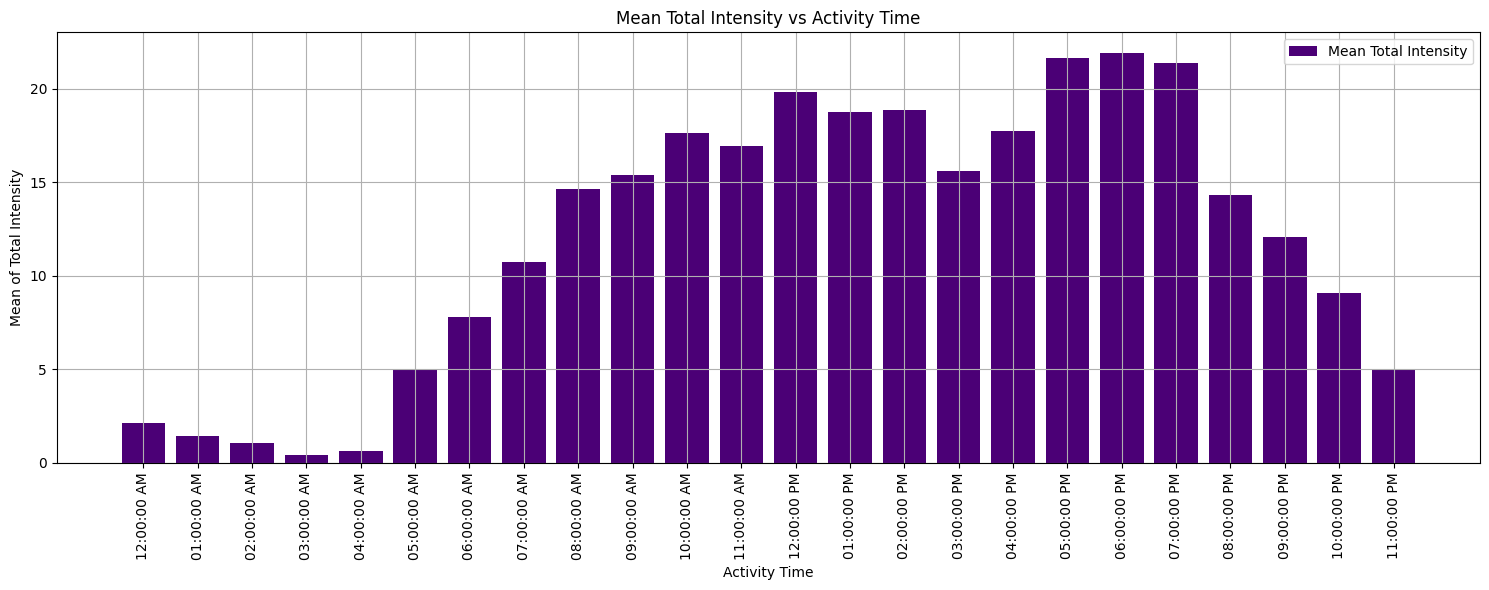

In [19]:
hourlyIntensities['ActivityTime'] = pd.to_datetime(hourlyIntensities['ActivityTime'], format='%I:%M:%S %p')
grpIntensities = hourlyIntensities.groupby('ActivityTime')['TotalIntensity'].mean().dropna().reset_index()
grpIntensities = grpIntensities.sort_values(by='ActivityTime')
grpIntensities['ActivityTime'] = grpIntensities['ActivityTime'].dt.strftime('%I:%M:%S %p')
plt.figure(figsize=(15, 6))
plt.bar(grpIntensities['ActivityTime'], grpIntensities['TotalIntensity'], color="#4b0076", label='Mean Total Intensity')
plt.xlabel("Activity Time")
plt.ylabel("Mean of Total Intensity")
plt.title("Mean Total Intensity vs Activity Time")
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

The Intensity increases from 5:00AM to 10:00AM. After which the intensity remain between 15 to 20 from 9:00 AM to 4:00 PM which may be due to work. The intensity is highest in the evening from 5:00 PM to 7:00 PM as people may utilise this for evening walks, etc.
Bellabeat may nudge their users in the morning for excercise or morning walks so as to improve their intensity.

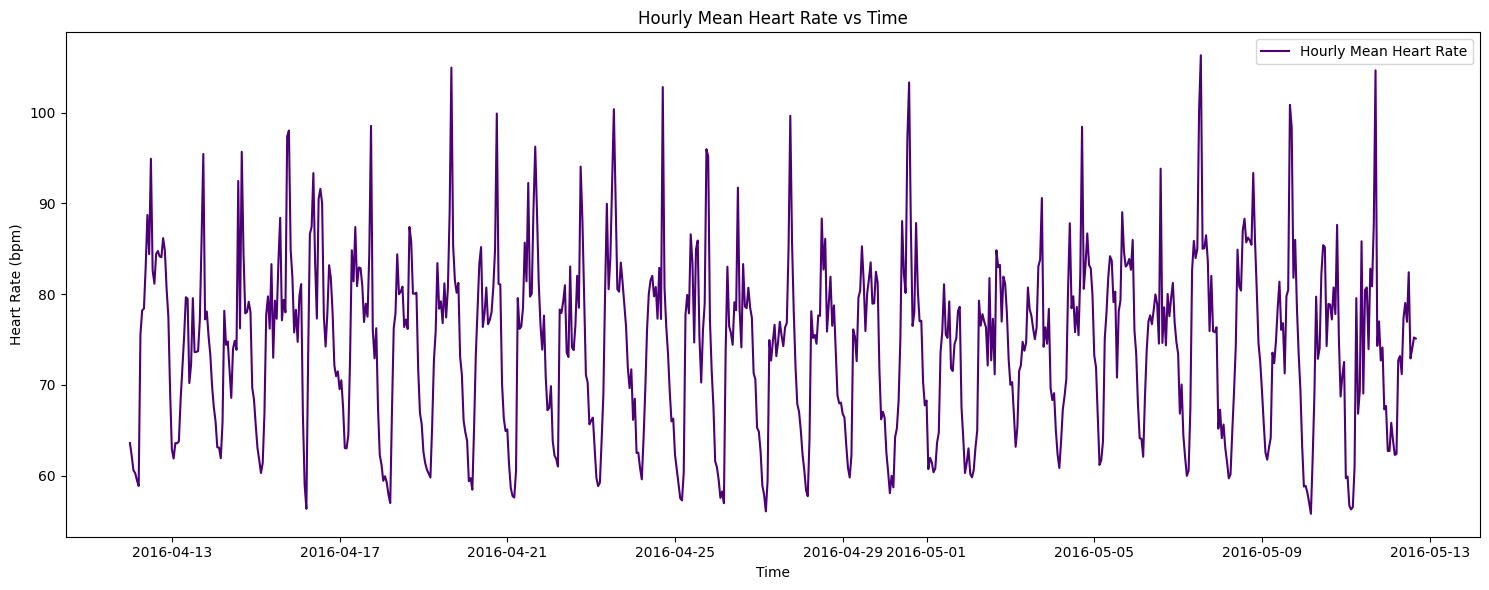

In [20]:
heartrateSeconds['ActivityDateTime'] = pd.to_datetime(heartrateSeconds['ActivityDate'].astype(str) + ' ' + heartrateSeconds['ActivityTime'])
heartrateSeconds.set_index('ActivityDateTime', inplace=True)
hourly_mean_hr = heartrateSeconds['Value'].resample('h').mean()
plt.figure(figsize=(15, 6))
plt.plot(hourly_mean_hr, label='Hourly Mean Heart Rate', color='#4b0076')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.title('Hourly Mean Heart Rate vs Time')
plt.legend()
plt.tight_layout()
plt.show()


The heartrate below 60 indicates a period of rest. Sometimes heartrate reaches above 100 bpm which may be due to intense exercise. Bellabeat may issue alerts for abnormally high or low heartrate which may need medical attention.

## __5. Act__
<hr color='black'>

###  __Recommendations based on the case study:__
1. The mean steps of 7637 suggest that the participants are somewhat active. Centers for Disease Control and Prevention (CDC) recommends near about 10000 steps for healthy adults in order to achieve health benifits such as lose weight, reduce risk of heart disease, etc. Bellabeat can allow users to set goals and provide goal recommendations based on user's data such as height, weight, health conditions and fitness target. Bellabeat can also nudge people and encourage them to complete their goal.

2. Based on the users fitness goal, Bellabeat can recommend fitness regime to help them achieve health benefits. Bellabeat can also show daily how many people with the same goal have achieved their fitness targets so as to encourage users to reduce sedentary time in order to achieve their goals.

3. In order to improve the sleep duration, Bellabeat can encourage users to reduce sedentary time and increase the total active time as it may lead to more exertion and good quality sleep.

4. Bellabeat can also add a feature to issue alarm if the heartrate reaches abnormally high or low level ie. above 100 or below 60.

5. To improve its marketing, Bellabeat can provide points to its users if they complete their fitness goals. The points could be redeemed to get discount on some of Bellabeat's products. Bellabeat can also reward points to user's, to fill surveys about its current features and what they would like to see in its future products. This would help Bellabeat to assess the market gap and customise their products based on user requirements.